In [526]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.metrics import confusion_matrix

In [491]:
doctors=pd.read_csv("../data and predictions/doctors.csv")
doctors["Potot_url"]=["" for i in  range(len(doctors.iloc[:,1]))]



In [492]:
doctors

,Disease,Doctor Name,Specialization,Contact,Address,Email,Photo_url,Potot_url
0,Fungal infection,Dr. Ayesha Kumar,Dermatologist,555-1234-123,"Health St, Mumbai, Maharashtra, India",ayesha.kumar@healthcare.com,NaN,
1,Allergy,Dr. Rohan Mehta,Allergist,555-5678-456,"Allergy Rd, Delhi, India",rohan.mehta@allergycare.com,NaN,
2,GERD,Dr. Aarav Sharma,Gastroenterologist,555-8765-789,"Digestive Ln, Bangalore, Karnataka, India",aarav.sharma@gastrocare.com,NaN,
3,Chronic cholestasis,Dr. Pooja Singh,Hepatologist,555-2345-321,"Liver Ave, Hyderabad, Telangana, India",pooja.singh@hepatologycare.com,NaN,
4,Drug Reaction,Dr. Arjun Patel,Immunologist,555-3456-654,"Immune Blvd, Chennai, Tamil Nadu, India",arjun.patel@immunocare.com,NaN,
5,Peptic ulcer disease,Dr. Sanya Nair,Gastroenterologist,555-4567-987,"Ulcer Way, Kolkata, West Bengal, India",sanya.nair@gastrocare.com,NaN,
6,AIDS,Dr. Rajesh Gupta,Infectious Disease Specialist,555-6789-111,"Infection St, Pune, Maharashtra, India",rajesh.gupta@infectiouscare.com,NaN,
7,Diabetes,Dr. Manish Verma,Endocrinologist,555-7890-222,"Sugar Ln, Jaipur, Rajasthan, India",manish.verma@endocrinecare.com,NaN,
8,Gastroenteritis,Dr. Kavita Rao,Gastroenterologist,555-8901-333,"Stomach Blvd, Ahmedabad, Gujarat, India",kavita.rao@gastrocare.com,NaN,
9,Bronchial Asthma,Dr. Anjali Malhotra,Pulmonologist,555-9012-444,"Lung St, Surat, Gujarat, India",anjali.malhotra@pulmocare.com,NaN,


In [493]:
heart_data=pd.read_csv("./heart_disease.csv")


In [494]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [495]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [496]:
heart_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [497]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [498]:
heart_data.shape

(297, 14)

Data Analysis 

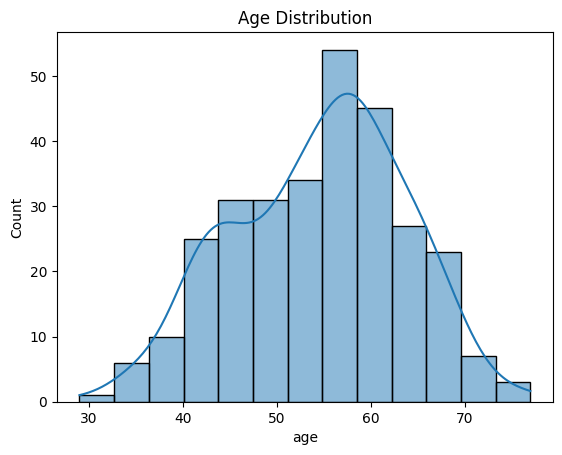

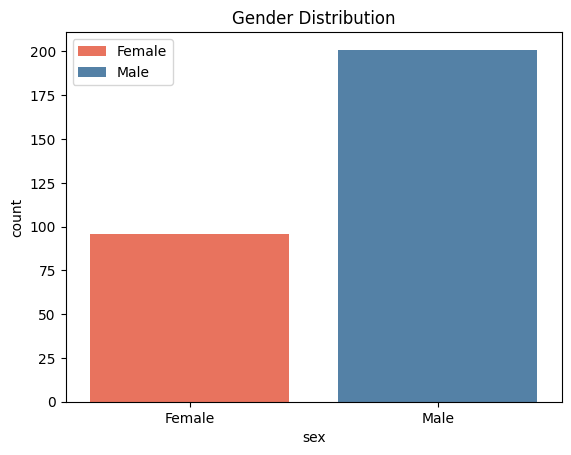

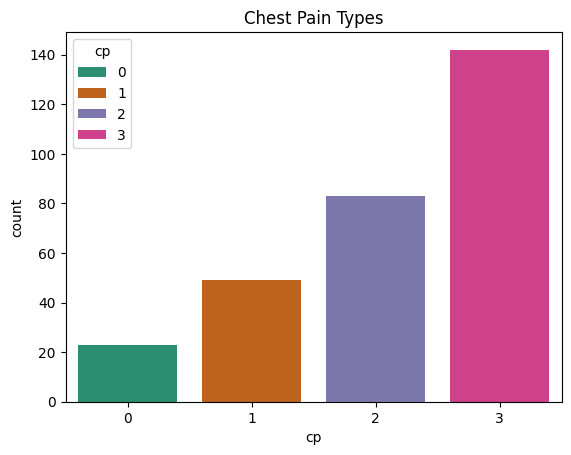

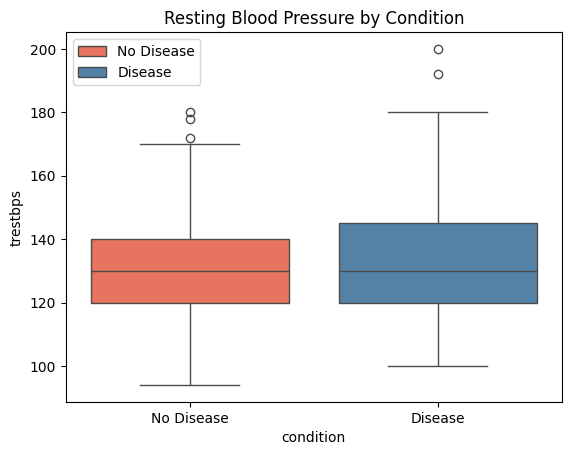

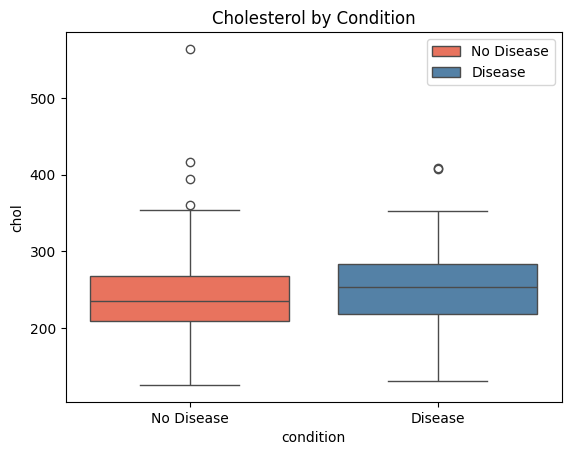

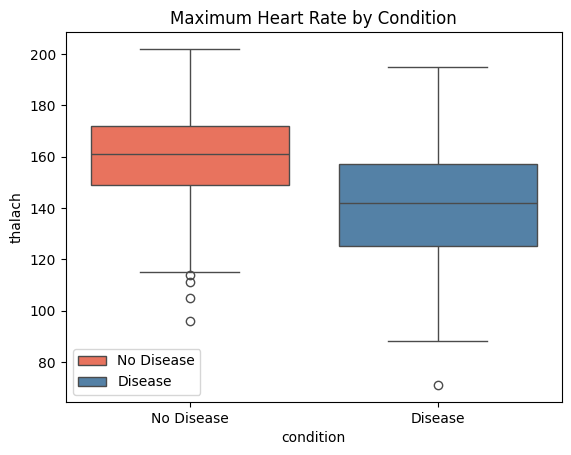

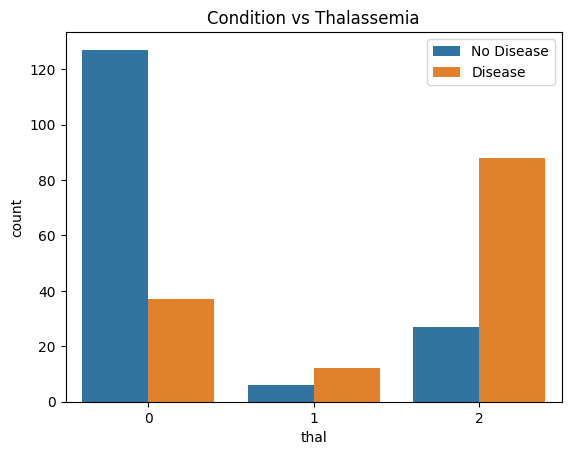

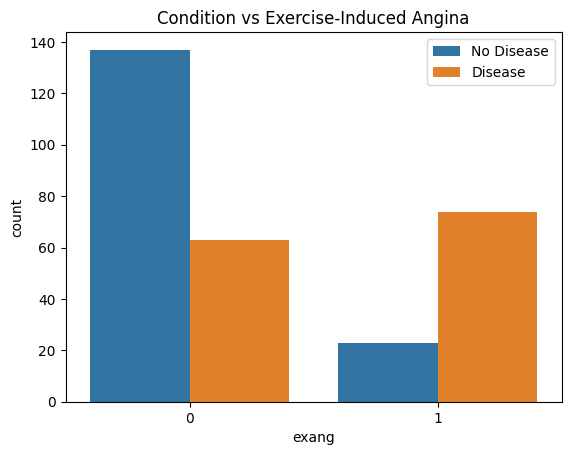

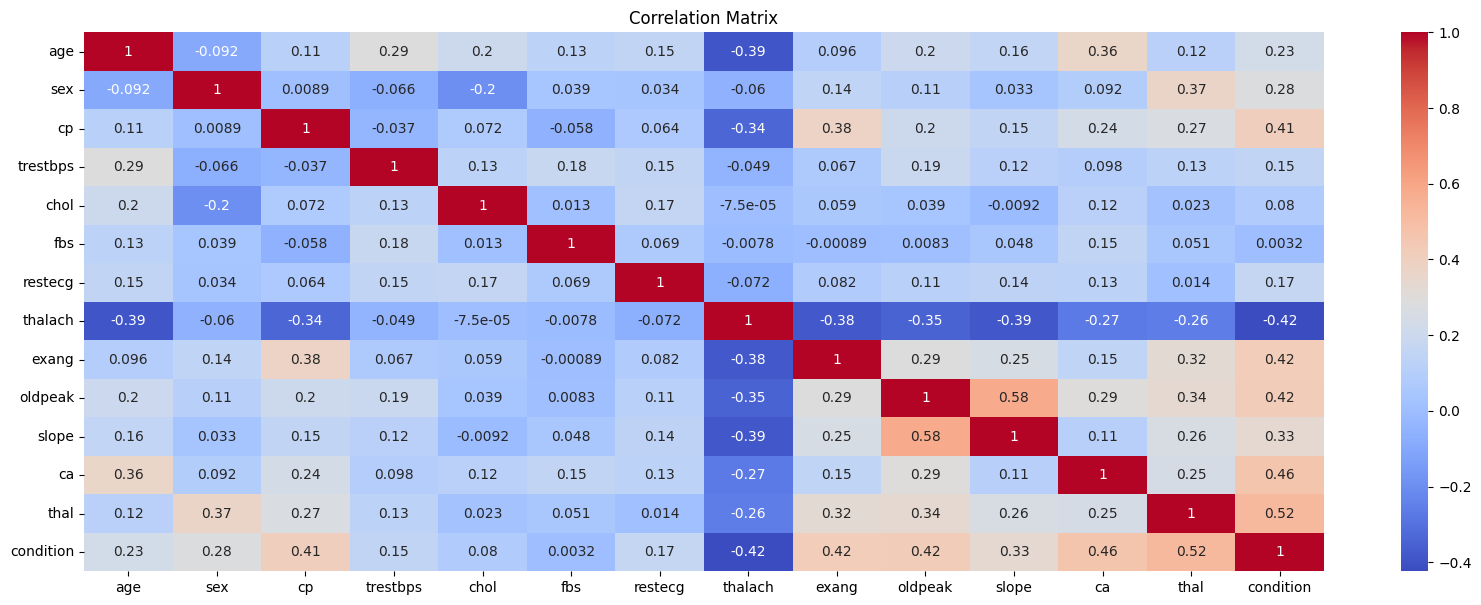

In [508]:


# Age distribution
sns.histplot(heart_data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Gender distribution
sns.countplot(x='sex', data=heart_data, hue='sex',palette= ["#FF6347", "#4682B4"] )
plt.xticks([0, 1], ["Female", "Male"])
plt.legend(["Female", "Male"])
plt.title('Gender Distribution')
plt.show()

# Chest pain types
sns.countplot(x='cp', data=heart_data,hue="cp", palette='Dark2')
plt.title('Chest Pain Types')
plt.show()

# Box plots
sns.boxplot(x='condition', y='trestbps', hue='condition' ,data=heart_data,palette= ["#FF6347", "#4682B4"])
plt.xticks([0, 1], ["No Disease", "Disease"])
plt.legend(["No Disease","Disease"])
plt.title('Resting Blood Pressure by Condition')
plt.show()

sns.boxplot(x='condition', y='chol', hue='condition', data=heart_data,palette= ["#FF6347", "#4682B4"])
plt.xticks([0, 1], ["No Disease", "Disease"])
plt.legend(["No Disease","Disease"])
plt.title('Cholesterol by Condition')
plt.show()

sns.boxplot(x='condition', y='thalach', hue='condition', data=heart_data,palette= ["#FF6347", "#4682B4"])
# plt.xticks("No Disease","Disease")
plt.xticks([0, 1], ["No Disease", "Disease"])
plt.legend(["No Disease","Disease"])
plt.title('Maximum Heart Rate by Condition')
plt.show()

# Condition vs Thalassemia
sns.countplot(x='thal', hue='condition', data=heart_data,)
plt.legend(["No Disease","Disease"])
plt.title('Condition vs Thalassemia')
plt.show()

# Exercise-Induced Angina
sns.countplot(x='exang', hue='condition', data=heart_data)
plt.legend(["No Disease","Disease"])
plt.title('Condition vs Exercise-Induced Angina')
plt.show()

# Correlation matrix
plt.figure(figsize=(20,7))
corr_matrix = heart_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



Bivariate Analysis

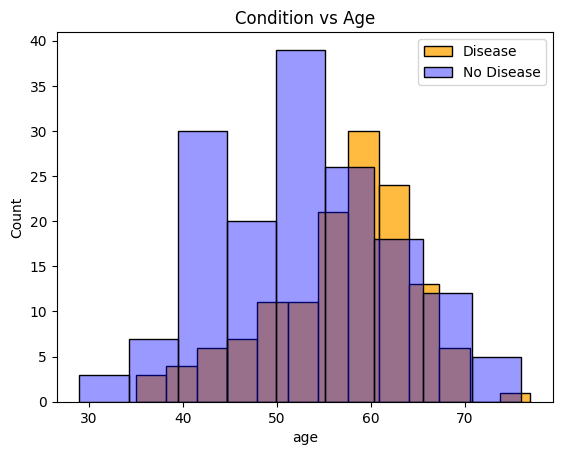

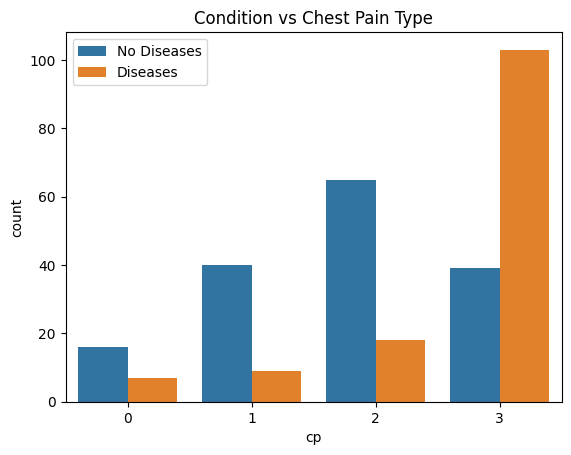

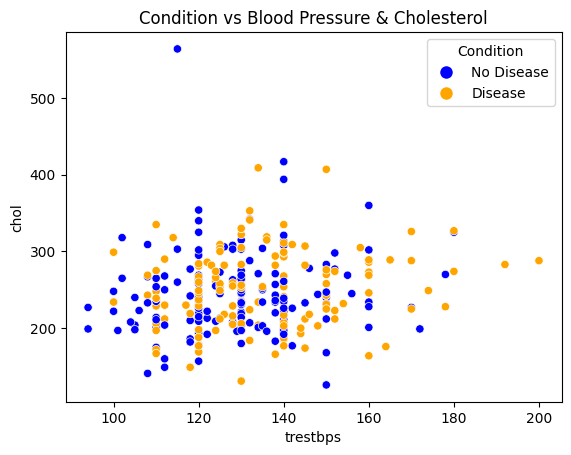

In [525]:
# Condition vs Age
sns.histplot(heart_data[heart_data['condition'] == 1]['age'], color='orange', label='Disease')
sns.histplot(heart_data[heart_data['condition'] == 0]['age'], color='blue', label='No Disease',alpha=0.4)
plt.title('Condition vs Age')
plt.legend()
plt.show()

# Condition vs Chest Pain Type
sns.countplot(x='cp', hue='condition', data=heart_data)
plt.legend(["No Diseases","Diseases"])
plt.title('Condition vs Chest Pain Type')
plt.show()

# Scatter plot with legends based on 'condition'
sns.scatterplot(x='trestbps', y='chol', hue='condition', data=heart_data, palette={0: 'blue', 1: 'orange'})

# Customizing the legend
plt.legend(title='Condition', loc='upper right', labels=["No Disease", "Disease"], handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Disease')
])

plt.title('Condition vs Blood Pressure & Cholesterol')
plt.show()


Anomaly Detection

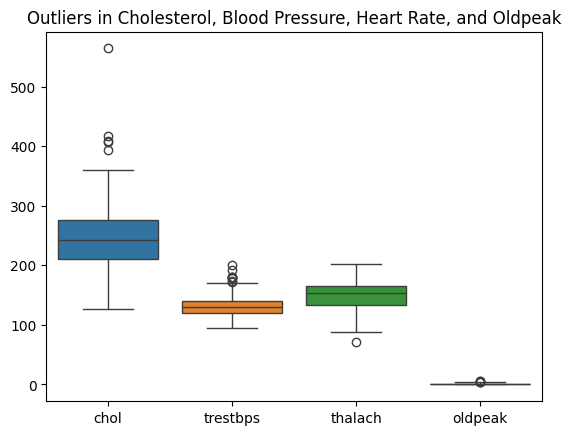

In [ ]:
# Outliers detection using boxplot
sns.boxplot(data=heart_data[['chol', 'trestbps', 'thalach', 'oldpeak']])
plt.title('Outliers in Cholesterol, Blood Pressure, Heart Rate, and Oldpeak')
plt.show()


In [ ]:
heart_data.rename(columns={'condition': 'target'}, inplace=True)
#1->have heart diseases
#0->not have heart diseases
heart_data["target"].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [ ]:
X=heart_data.drop("target",axis=1)
Y=heart_data["target"]

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [531]:
# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state=42)

In [ ]:
print(X.shape,x_train.shape,x_test.shape)

(297, 13) (222, 13) (75, 13)


In [ ]:
# creating K-Nearest-Neighbor classifier
model=RandomForestClassifier(n_estimators=20)

In [ ]:

model.fit(x_train, y_train)

p = model.score(x_test,y_test)
print(p)

0.8


In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [ ]:
y_pred= model.predict(x_test)
print(y_pred)

[1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0
 1]


In [ ]:

print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred)*100),2)))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 80.0%

[[31  7]
 [ 8 29]]


In [ ]:
from sklearn import metrics
ClassificationReport=metrics.classification_report(y_pred,y_test)

In [ ]:
print("Classification Report")
print(ClassificationReport)

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        39
           1       0.78      0.81      0.79        36

    accuracy                           0.80        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.80      0.80      0.80        75



In [558]:
# Define base models
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
base_models = [
  ('logistic', LogisticRegression(solver='liblinear')),
    ('svc', SVC(probability=True, kernel='linear', random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('naive_bayes', GaussianNB())
]

# Define the meta-model
meta_model = LogisticRegression(solver='liblinear')

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


In [559]:
# Train the stacking classifier
stacking_clf.fit(x_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('logistic',
                                LogisticRegression(solver='liblinear')),
                               ('svc',
                                SVC(kernel='linear', probability=True,
                                    random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('decision_tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('naive_bayes', GaussianNB())],
                   final_estimator=LogisticRegression(solver='liblinear'))

In [560]:
# Make predictions
y_pred = stacking_clf.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.82


In [562]:
ClassificationReportOfMetaModel=metrics.classification_report(y_pred,y_test)
print("classification Report","\n",ClassificationReportOfMetaModel)


classification Report 
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        44
           1       0.86      0.78      0.82        46

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



In [542]:
import pickle
filename="heart_model.sav"
pickle.dump(model,open(filename,"wb"))
loaded_model=pickle.load(open(filename,"rb"))